In [14]:
import pandas as pd
from sqlalchemy import create_engine, text
import os


In [15]:
user = os.environ.get("DB_USER")
pw = os.environ.get("DB_PASSWORD")
db = os.environ.get("DB_USER")
host = os.environ.get("DB_HOST")
port = os.environ.get("DB_PORT")


uri = f"postgresql+psycopg2://{user}:{pw}@{host}:{port}/{db}"
engine = create_engine(uri)

In [54]:
query = text("SELECT * FROM records_2min_clean;")
conn = engine.connect()
df = pd.read_sql(query, conn)
conn.close()

In [55]:
df.columns

Index(['time', 'device_id', 'mass_concentration_pm1p0',
       'mass_concentration_pm2p5', 'mass_concentration_pm4p0',
       'mass_concentration_pm10p0', 'ambient_humidity', 'ambient_temperature',
       'voc_index', 'nox_index', 'hour', 'minute_of_hour', 'day_of_week',
       'day_name'],
      dtype='object')

In [56]:
cols = ['mass_concentration_pm1p0', 'mass_concentration_pm2p5', 'mass_concentration_pm4p0', 'mass_concentration_pm10p0']
print(len(df))

for col in cols:
  df.loc[df[col] > 100, col] = 100


102760


In [57]:
df.loc[df['nox_index'] > 10, 'nox_index'] = 10


In [58]:
df.index = pd.DatetimeIndex(df['time'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102760 entries, 2024-03-02 10:10:00 to 2024-03-27 14:34:00
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       102760 non-null  datetime64[ns]
 1   device_id                  102760 non-null  int64         
 2   mass_concentration_pm1p0   102760 non-null  float64       
 3   mass_concentration_pm2p5   102760 non-null  float64       
 4   mass_concentration_pm4p0   102760 non-null  float64       
 5   mass_concentration_pm10p0  102760 non-null  float64       
 6   ambient_humidity           101627 non-null  float64       
 7   ambient_temperature        101627 non-null  float64       
 8   voc_index                  101627 non-null  float64       
 9   nox_index                  101627 non-null  float64       
 10  hour                       102760 non-null  float64       
 11  minute_of_hour    

In [60]:
df.describe()

,device_id,mass_concentration_pm1p0,mass_concentration_pm2p5,mass_concentration_pm4p0,mass_concentration_pm10p0,ambient_humidity,ambient_temperature,voc_index,nox_index,hour,minute_of_hour,day_of_week
count,102760.000000,102760.000000,102760.000000,102760.000000,102760.000000,101627.000000,101627.000000,101627.000000,101627.000000,102760.000000,102760.000000,102760.000000
mean,34.701781,13.359427,14.588962,15.082623,15.324259,74.343252,10.392810,113.824097,1.438332,11.521983,28.974173,3.962554
std,3.034278,13.675763,14.153799,14.127824,14.131397,15.365621,3.585349,59.059609,0.973241,6.921132,17.302504,2.047081
min,31.000000,0.000000,0.000000,0.000000,0.000000,23.120000,1.170000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,4.200000,5.225000,5.725000,5.933333,63.569167,8.107111,77.000000,1.000000,6.000000,14.000000,2.000000
50%,34.000000,8.166667,9.300000,10.000000,10.300000,75.310000,10.090000,100.000000,1.000000,12.000000,28.000000,4.000000
75%,37.000000,16.800000,17.900000,18.327083,18.700000,85.900000,12.388000,134.000000,2.000000,18.000000,44.000000,6.000000
max,40.000000,100.000000,100.000000,100.000000,100.000000,100.000000,36.490000,499.000000,10.000000,23.000000,58.000000,7.000000


In [61]:
X_full = df[df['device_id'] == 34].dropna()
y_full = X_full['mass_concentration_pm10p0']
feature_names = X_full.columns.values.tolist()

In [40]:
feature_names

['time',
 'device_id',
 'mass_concentration_pm1p0',
 'mass_concentration_pm2p5',
 'mass_concentration_pm4p0',
 'mass_concentration_pm10p0',
 'ambient_humidity',
 'ambient_temperature',
 'voc_index',
 'nox_index',
 'hour',
 'minute_of_hour',
 'day_of_week',
 'day_name']

In [70]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
    robust_scale,
    quantile_transform
)

# dataset = fetch_california_housing()
# X_full, y_full = dataset.data, dataset.target
# feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HouseAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
    "day_of_week": "Day of the week",
    "hour": "Hour of the day",
    'ambient_humidity': "Humidity",
    'ambient_temperature': "Temperature",
    'voc_index': "VOC Index",
    'nox_index': "NOx Index",
    'mass_concentration_pm10p0': "PM10",
    'mass_concentration_pm2p5': "PM2.5",
    'mass_concentration_pm1p0': "PM1",
    'mass_concentration_pm4p0': "PM4",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["hour", "voc_index"]
# features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full.to_numpy()[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    # (
    #     "Data after power transformation (Box-Cox)",
    #     PowerTransformer(method="box-cox").fit_transform(X),
    # ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full.to_numpy().reshape(-1, 1))

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [63]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of NOx",
    )

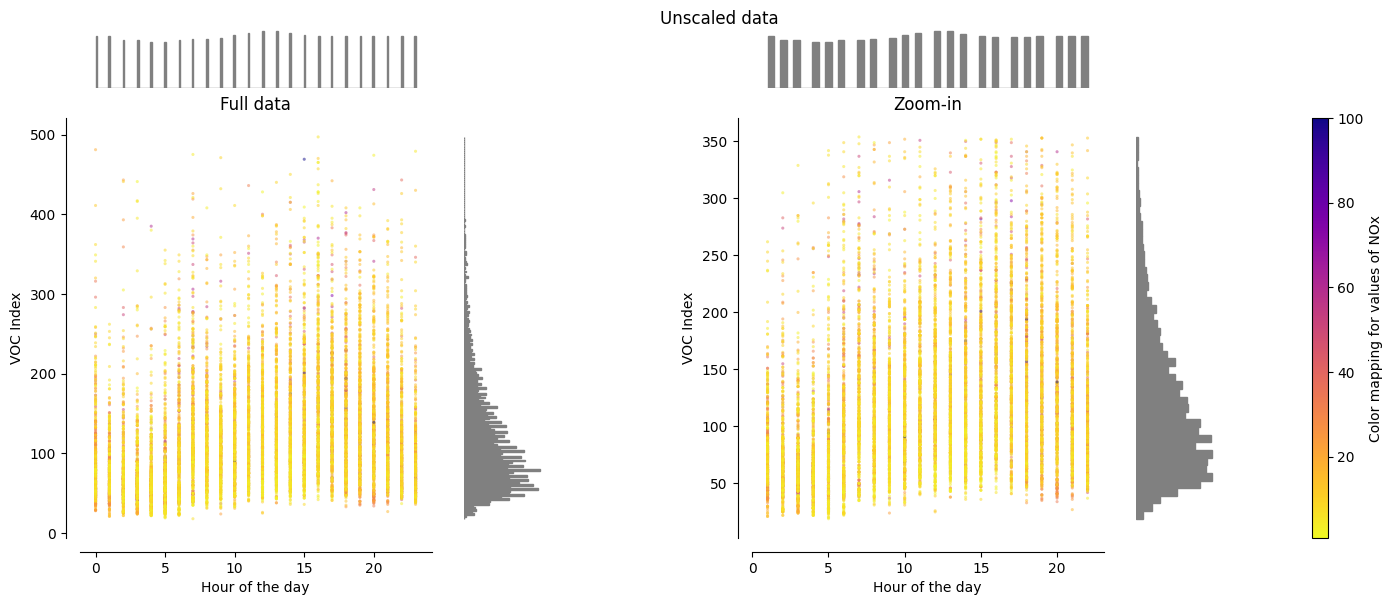

In [71]:
make_plot(0)


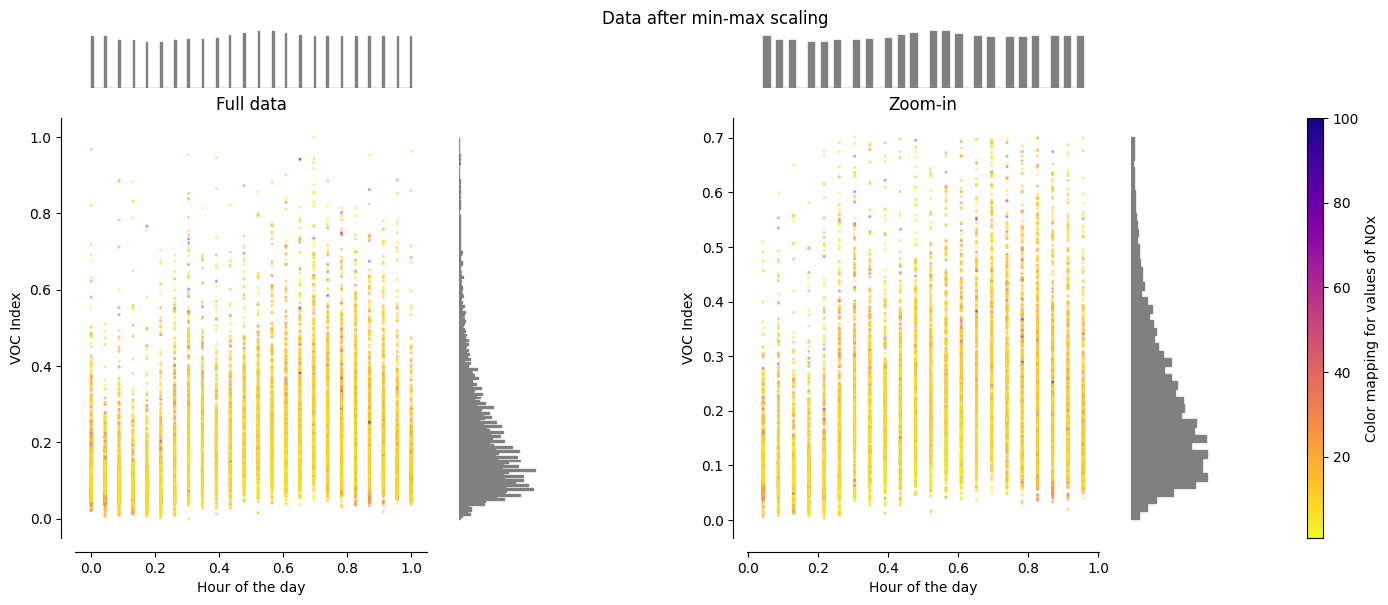

In [72]:
make_plot(2)

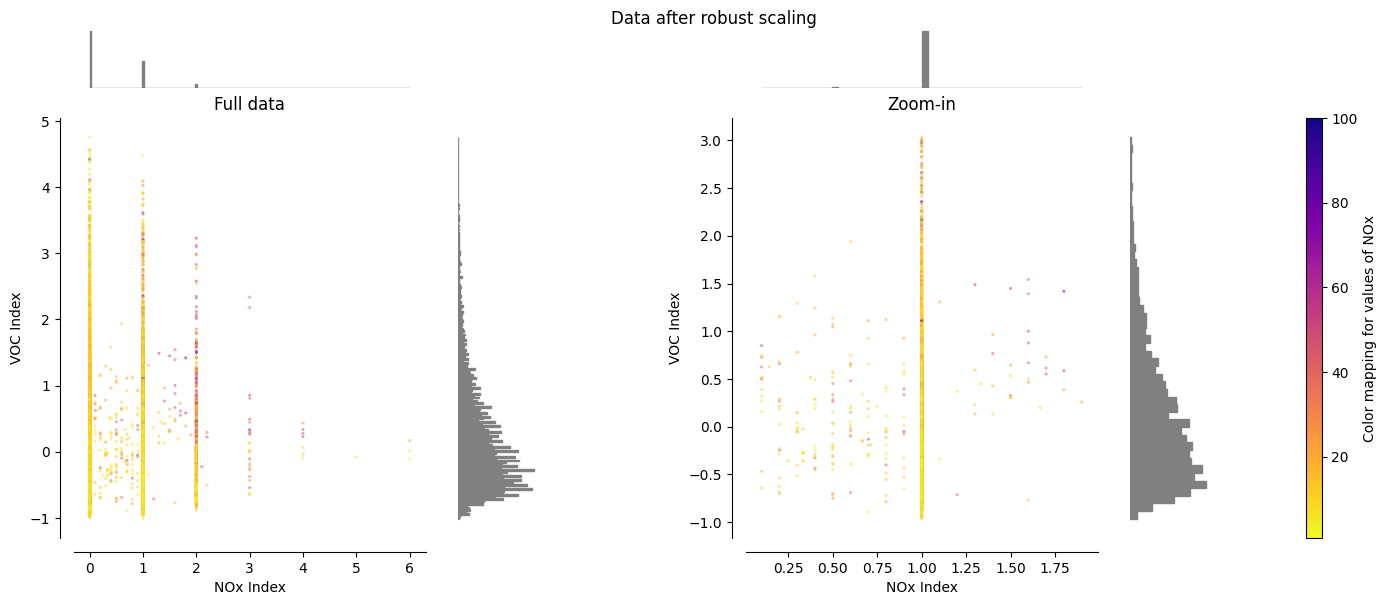

In [66]:
make_plot(4)

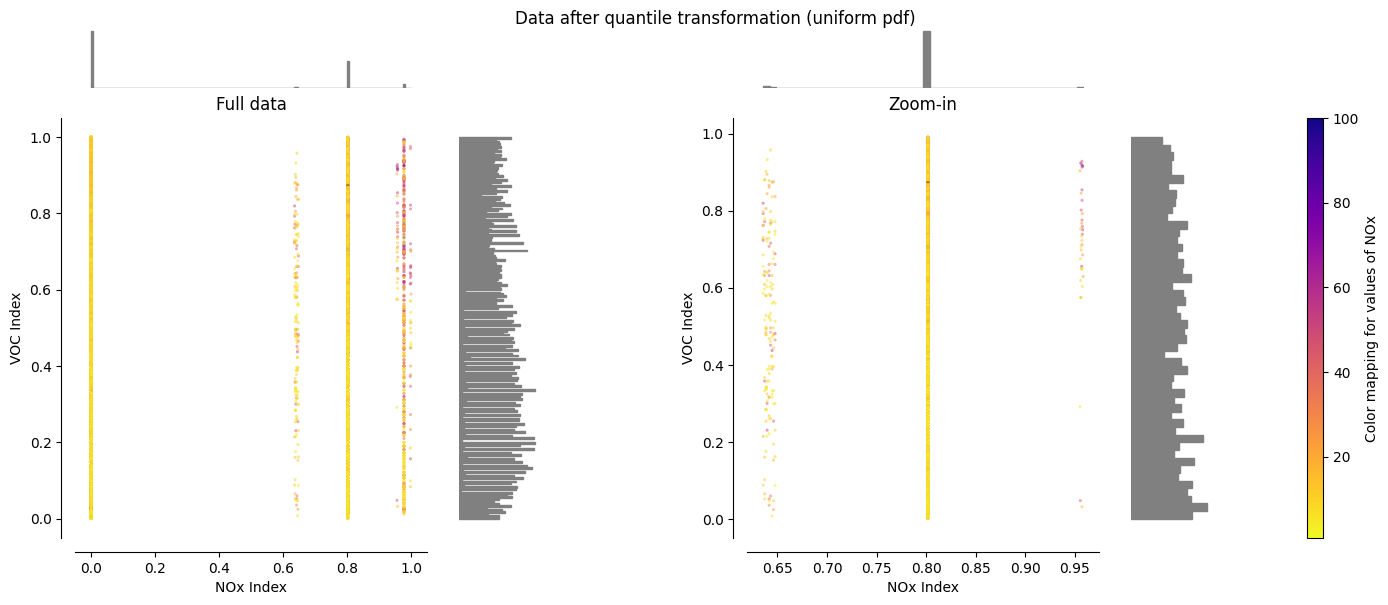

In [67]:
make_plot(6)

In [30]:
plot_cols = ['mass_concentration_pm10p0', 'ambient_humidity', 'ambient_temperature', 'voc_index', 'nox_index']

In [31]:
df[df['device_id'] == 34].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12914 entries, 2024-03-08 10:20:00 to 2024-03-27 13:46:00
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       12914 non-null  datetime64[ns]
 1   device_id                  12914 non-null  int64         
 2   mass_concentration_pm1p0   12914 non-null  float64       
 3   mass_concentration_pm2p5   12914 non-null  float64       
 4   mass_concentration_pm4p0   12914 non-null  float64       
 5   mass_concentration_pm10p0  12914 non-null  float64       
 6   ambient_humidity           12828 non-null  float64       
 7   ambient_temperature        12828 non-null  float64       
 8   voc_index                  12828 non-null  float64       
 9   nox_index                  12828 non-null  float64       
 10  hour                       12914 non-null  float64       
 11  minute_of_hour             12914

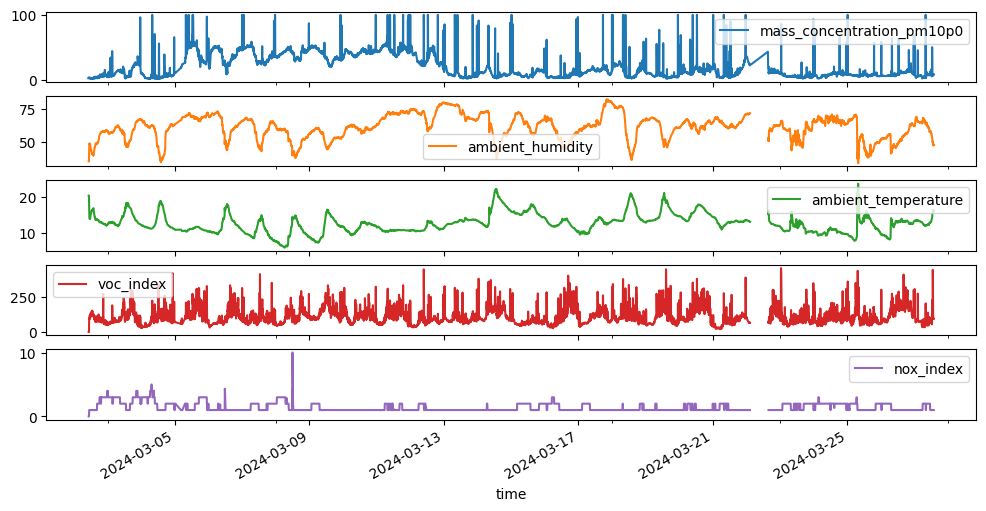

In [53]:
plot_features = df[df['device_id'] == 31][plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,6))